In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Read in data
data = pd.read_csv("Asylum_seekers_per_country_per_year_w_next_year_12_3.csv")

In [48]:
# Create current_population feature
curr_pop_list = []
for index, row in data.iterrows():
    curr_year = str(int(row.Year))
    curr_pop = row[curr_year]
    curr_pop_list.append(curr_pop)
data['current_population']=curr_pop_list

# [Not very useful] Create before_2015 feature
#data['before_2015'] = (data['Year']<2015).astype(int)

In [49]:
# Remove N/A's in Gdelt fields and current_population (these are mismatched countries, bad records anyways)
print(data.shape)
data = data.dropna(subset=['QuadClass','NuMentions'])
print(data.shape)
data = data.dropna(subset=['current_population'])
print(data.shape)
# Remove N/A's in economic data (hopefully we'll fill some of these)
data = data.dropna(subset=['Unemployment Rate',
                           'GDP Per Capita',
                           'Life expectancy',])

data.shape

(3757, 124)
(3717, 124)
(3576, 124)


(3508, 124)

In [118]:
# Create y vector, 2000-2017
years = np.arange(2000,2017)
# Tried removing 2014 and 2015, but not very impactful
#years = np.delete(years,[14,15],axis=0)

y = data.loc[data.Year.isin(years),'applied_next_year']

# Log of y, the +0.5 adjustment to avoid ln(0) = -inf
y_ln = np.log(y+0.5)

# Create X feature matrix, including only the columns that we want to predict on in feature_list
feature_list = [
    'Applied during year_x',
    'current_population',
    'Unemployment Rate',
    'GDP Per Capita',
    'Life expectancy',
    'GoldsteinScale',
    'NuMentions',
    'AvgTone',
    'QuadClass',
    'Goldstein_Neg_5',
    'Goldstein_Pos_5',
    'Goldstein_Pos_7',
    'Goldstein_Pos_8',
    'Goldstein_Pos_9',
    'Event_Code_19_20',
    'Extreme_Pos_Tone_Events',
    'Extreme_Neg_Tone_Events'
    ]
X = data.loc[data.Year.isin(years),feature_list]

Text(0, 0.5, 'Histogram Number of country-years')

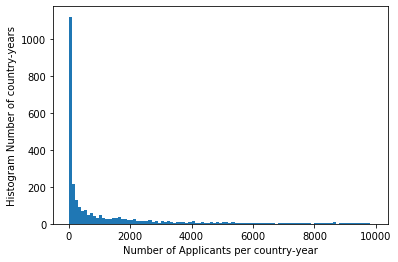

In [119]:
# Plot the histogram of applicant counts per country-year
bin_arr = np.arange(0,10000,100)

plt.hist(y,bins=bin_arr)
plt.xlabel("Number of Applicants per country-year")
plt.ylabel("Histogram Number of country-years")

Text(0, 0.5, 'Histogram Number of country-years')

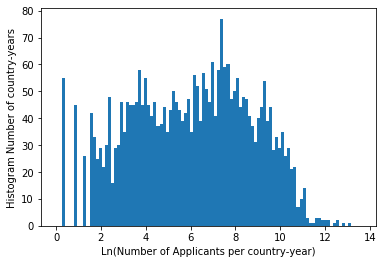

In [120]:
# Plot the histogram of ln(applicant counts per country-year)

bin_arr_ln = np.arange(0,y_ln.max(),y_ln.max()/100)

plt.hist(y_ln,bins=bin_arr_ln)
plt.xlabel("Ln(Number of Applicants per country-year)")
plt.ylabel("Histogram Number of country-years")

In [121]:
# Check for columns with N/A's and count the N/A's
for col in X:
    if X[col].isna().any():
        print(col,X[col].value_counts(dropna=False))

In [170]:
# Modeling!
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
#import xgboost as xgb

# Normalize X and y
# Note: I'm normalizing (setting mean to 0) not standardizing (setting variance to 1)
transformer = Normalizer().fit(X)
X_norm = transformer.transform(X)


In [171]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# X_vif = add_constant(X_norm)
# print(pd.Series([variance_inflation_factor(X_vif, i) 
#                for i in range(X_vif.shape[1])]))
# print(X_vif[0:2,:])

,dfb_x1,dfb_x2,dfb_x3,dfb_x4,dfb_x5,dfb_x6,dfb_x7,dfb_x8,dfb_x9,dfb_x10,...,dfb_x14,dfb_x15,dfb_x16,dfb_x17,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.250551,0.020299,0.037301,-0.003845,-0.001862,-0.012706,0.021054,0.007222,-0.011209,-0.050646,...,-0.032961,0.055691,0.008215,0.038746,0.003739,-1.391849,0.031765,-0.252103,-1.392058,-0.252141
1,0.029523,0.009007,-0.006295,0.000309,-0.002092,-0.000198,0.002483,-0.002367,-0.000216,0.002976,...,-0.004739,-0.005118,0.000703,-0.006701,0.000096,1.009835,0.001592,0.040326,1.009838,0.040326
2,0.012708,0.018248,-0.005222,-0.000283,-0.003951,-0.003028,0.003598,-0.000319,-0.001874,-0.001843,...,-0.012489,-0.000878,0.002488,-0.003071,0.000071,1.337089,0.000670,0.034633,1.337257,0.034637
3,0.003915,0.019269,-0.003936,-0.000856,-0.003385,-0.003939,0.005934,0.001126,-0.003524,-0.003510,...,-0.013028,0.004577,0.000884,-0.001838,0.000052,1.229171,0.000587,0.029778,1.229271,0.029780
4,0.000033,0.021394,-0.003725,-0.001000,-0.003060,-0.001611,0.003879,-0.000828,-0.001558,-0.001010,...,-0.008507,0.001620,0.001708,-0.001915,0.000043,1.247890,0.000471,0.027092,1.248001,0.027094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,-0.008123,0.008981,0.000327,-0.000523,-0.001682,-0.005855,0.009112,0.003038,-0.005521,-0.008778,...,-0.011761,0.011008,-0.001393,0.000835,0.000033,0.573966,0.001721,0.023834,0.573905,0.023831
3729,-0.011119,0.014524,-0.000482,-0.001352,-0.002064,-0.006145,0.006446,0.003644,-0.004214,-0.019548,...,-0.008876,0.020532,0.005444,0.016409,0.000059,0.819793,0.001496,0.031732,0.819750,0.031731
3730,-0.015307,0.014073,0.000002,-0.000904,-0.001700,-0.005993,0.009307,-0.000776,-0.002534,-0.026932,...,-0.011287,0.022783,0.012324,0.021413,0.000132,0.956399,0.002446,0.047354,0.956386,0.047353
3750,0.078624,-0.054584,-0.015716,-0.012844,0.020268,0.120087,-0.353465,0.114426,0.058598,0.287615,...,-0.005030,-0.287604,-0.080567,-0.030618,0.013928,-2.560789,0.034849,-0.486599,-2.563070,-0.487033


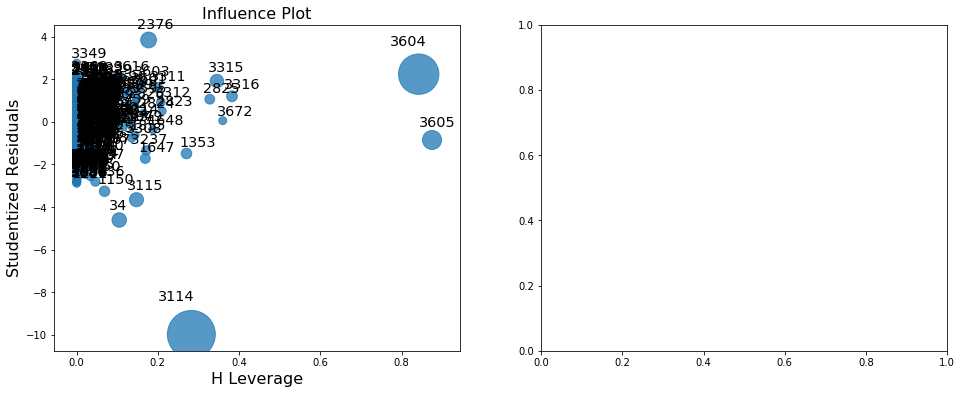

In [168]:
import statsmodels.api as sm
import math

lm2 = sm.OLS(y_ln,X_norm)
results = lm2.fit()
# # print(results.summary())
resid = results.resid
# print(resid.shape)
# print(resid.min())
# print(resid.idxmin())
# argmin = np.argmin(resid, axis=1)
# print(argmin)
# print(np.min(resid))
# print(resid[argmin])
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))

ax1 = sm.graphics.influence_plot(results, ax=ax1, criterion="cooks")

influence = results.get_influence()

influence.summary_frame()

In [175]:

#Train_test_split, post-normalizing
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_ln, test_size=0.2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
r^2:  0.3497325580090819 



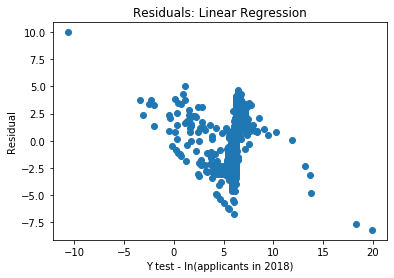

In [176]:
# Function for trying out models
def test_reg(reg,X_train, X_test, y_train, y_test, index, return_reg=False):
    '''test_reg takes a regressor object and the 4 data sets, trains the regressor, makes predictions
    on the test set, and prints an r^2 score.  Returns trained regressor if return_reg=True.'''
    reg.fit(X_train,y_train)
    preds = reg.predict(X_test)
    print(reg,"\nr^2: ",r2_score(y_test,preds),"\n")

    model_name = ['Linear Regression', 'ElasticNetCV', 'Decision Tree Regressor',
                 'Random Forest Regressor', 'Gradient Boosting Regressor'][index]
    plt.figure(index)
    residuals = y_test-preds
    plt.title('Residuals: ' + model_name)
    plt.ylabel('Residual')
    plt.xlabel('Y test - ln(applicants in 2018)')
    plt.scatter(preds, residuals)

    if return_reg:
        return reg

# Instantiate the regressors
LR_reg = linear_model.LinearRegression()
EN_reg = linear_model.ElasticNetCV(cv=10)
DT_reg = tree.DecisionTreeRegressor()
RF_reg = ensemble.RandomForestRegressor(n_estimators=100)
GB_reg = ensemble.GradientBoostingRegressor()
#XGB_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Train and test all models with default settings
for index, model  in enumerate([LR_reg]):
    test_reg(model,X_train, X_test, y_train, y_test, index)

In [134]:
# Random Forest provides feature_importance...not rock solid, but useful for some context
RF_reg.fit(X_train,y_train)

for name,imp in zip(X.columns,RF_reg.feature_importances_):
    print("{}: {:2.2}".format(name,imp))

Applied during year_x: 0.26
current_population: 0.026
Unemployment Rate: 0.0078
GDP Per Capita: 0.52
Life expectancy: 0.089
GoldsteinScale: 0.0097
NuMentions: 0.027
AvgTone: 0.0079
QuadClass: 0.03
Goldstein_Neg_5: 0.003
Goldstein_Pos_5: 0.0047
Goldstein_Pos_7: 0.0039
Goldstein_Pos_8: 0.0024
Goldstein_Pos_9: 0.0023
Event_Code_19_20: 0.004
Extreme_Pos_Tone_Events: 0.0066
Extreme_Neg_Tone_Events: 0.0011


In [135]:
'''# Hyperparameter tuning for the RandomForest model
# NOTE: This still isn't working very well.  I'm yet to get a model that beats the defaults.
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = ensemble.RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Make preds and calculate R^2
RF_optimized = best_grid = grid_search.best_estimator_
preds = best_grid.predict(X_test)
print(best_grid,"\nr^2: ",r2_score(y_test,preds),"\n")'''

'# Hyperparameter tuning for the RandomForest model\n# NOTE: This still isn\'t working very well.  I\'m yet to get a model that beats the defaults.\nfrom sklearn.model_selection import GridSearchCV\n# Create the parameter grid based on the results of random search \nparam_grid = {\n    \'bootstrap\': [True],\n    \'max_depth\': [80, 90, 100, 110],\n    \'max_features\': [2, 3],\n    \'min_samples_leaf\': [3, 4, 5],\n    \'min_samples_split\': [8, 10, 12],\n    \'n_estimators\': [100, 200, 300, 1000]\n}\n# Create a based model\nrf = ensemble.RandomForestRegressor()\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator = rf, param_grid = param_grid, \n                          cv = 3, n_jobs = -1, verbose = 2)\n\n# Fit the grid search to the data\ngrid_search.fit(X_train, y_train)\n\n# Make preds and calculate R^2\nRF_optimized = best_grid = grid_search.best_estimator_\npreds = best_grid.predict(X_test)\nprint(best_grid,"\nr^2: ",r2_score(y_test,preds),"\n")'

## Test Data: 2018

In [136]:
# Dependent Variable
y_17 = data.loc[data.Year==2017,'applied_next_year']

y_ln_17 = np.log(y_17+0.5)

# Feature Matrix
X_17 = data.loc[data.Year==2017,feature_list]

transformer_17 = Normalizer().fit(X_17)
X_norm_17 = transformer_17.transform(X_17)


In [137]:
# Predict on 2017
def pred_2017(reg,X_17, y_17):
    '''Takes a trained model and the final test X and test y, in this case 2017 data.'''
    preds = reg.predict(X_17)
    print(reg,"\nr^2: ",r2_score(y_17,preds),"\n")

# Run with best performing model
pred_2017(RF_reg,X_norm_17,y_ln_17)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 
r^2:  0.9347810461728001 

